In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler


In [5]:
data = pd.read_csv('Titanic-Dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [6]:
mask = data.isnull().any(axis=1) 
print(mask)

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Length: 891, dtype: bool


In [7]:
data_clean = data[~mask] # remove rows with missing data

In [11]:
data_clean = data_clean.reset_index()

In [12]:
data_clean.shape

(712, 12)

In [13]:
data_clean

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...,...
707,885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
708,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
709,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
710,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [8]:
data_clean.dtypes

index            int64
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [9]:
numeric_data = data_clean[['Survived' ,'Pclass' , 'Age' , 'SibSp','Parch','Fare']]
categorical_data = data_clean[['Name' ,'Embarked' , 'Sex' , 'Ticket']]

In [10]:
data_clean[['Survived' ,'Pclass' , 'Age' , 'SibSp','Parch','Fare']]

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
707,0,3,39.0,0,5,29.1250
708,0,2,27.0,0,0,13.0000
709,1,1,19.0,0,0,30.0000
710,1,1,26.0,0,0,30.0000


[Text(0, 0, 'Survived'),
 Text(1, 0, 'Pclass'),
 Text(2, 0, 'Age'),
 Text(3, 0, 'SibSp'),
 Text(4, 0, 'Parch'),
 Text(5, 0, 'Fare')]

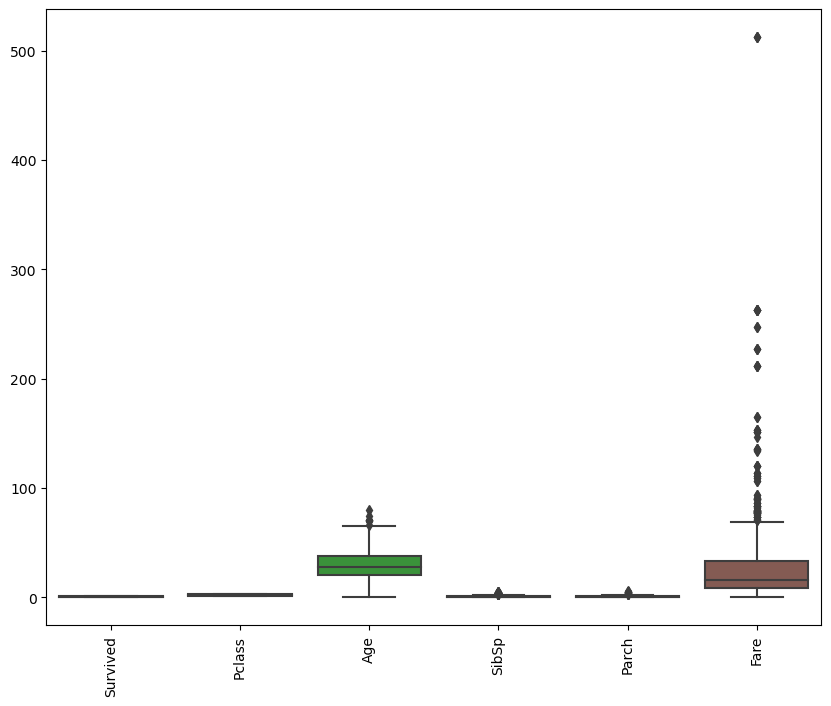

In [11]:
fig , ax = plt.subplots(figsize = (10 , 8))
bp = sns.boxplot(data=numeric_data)
bp.set_xticklabels(bp.get_xticklabels(),rotation = 90)

In [12]:
# scaler  = StandardScaler()
# scaled_array = scaler.fit_transform(numeric_data)


In [13]:
# scaled_data = pd.DataFrame(scaled_array,columns=numeric_data.columns)
# scaled_data.head()

In [14]:
# scaled_data.describe()

In [15]:
# fig , ax = plt.subplots(figsize = (10 , 8))
# bp = sns.boxplot(data=scaled_data)
# bp.set_xticklabels(bp.get_xticklabels(),rotation = 90)

In [16]:
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1 
print(IQR)

Survived     1.00
Pclass       2.00
Age         18.00
SibSp        1.00
Parch        1.00
Fare        24.95
dtype: float64


In [17]:
outlires_removed = numeric_data[-((numeric_data < (Q1 - 1.5 * IQR))\
                                 |(numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)]
outlires_removed.shape

(564, 6)

In [18]:
data_clean = data_clean[-((numeric_data < (Q1 - 1.5 * IQR))\
                                 |(numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [19]:
data_clean

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
...,...,...,...,...,...,...,...,...,...,...,...,...
706,884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,S
708,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
709,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
710,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [20]:
outlires_removed

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
5,0,1,54.0,0,0,51.8625
...,...,...,...,...,...,...
706,0,3,25.0,0,0,7.0500
708,0,2,27.0,0,0,13.0000
709,1,1,19.0,0,0,30.0000
710,1,1,26.0,0,0,30.0000


[Text(0, 0, 'Survived'),
 Text(1, 0, 'Pclass'),
 Text(2, 0, 'Age'),
 Text(3, 0, 'SibSp'),
 Text(4, 0, 'Parch'),
 Text(5, 0, 'Fare')]

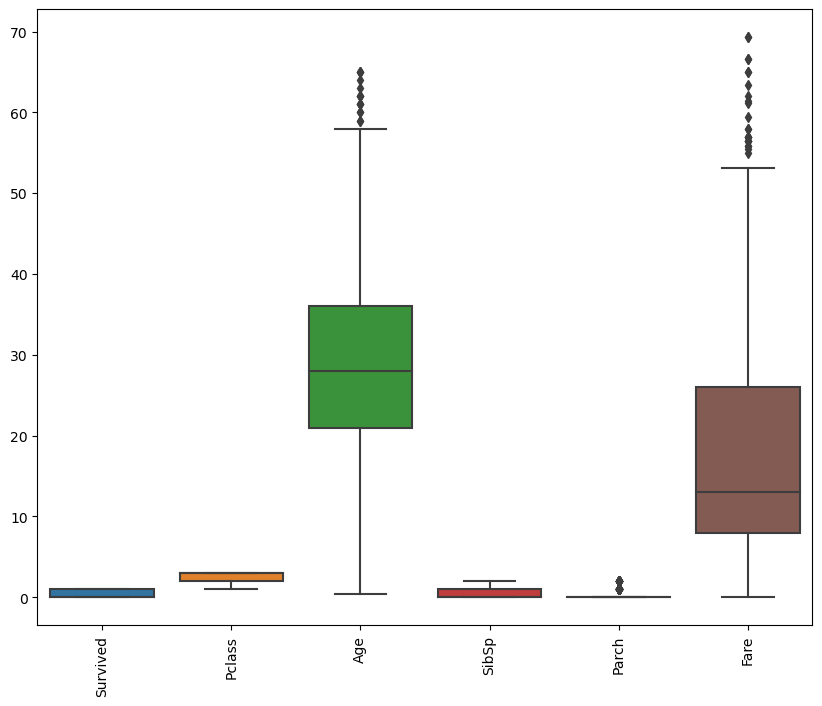

In [21]:
fig , ax = plt.subplots(figsize = (10 , 8))
bp = sns.boxplot(data=outlires_removed)
bp.set_xticklabels(bp.get_xticklabels(),rotation = 90)

In [22]:
data_clean[['Survived' ,'Pclass' , 'Age' , 'SibSp','Parch','Fare']] = outlires_removed[['Survived' ,'Pclass' , 'Age' , 'SibSp','Parch','Fare']]

C:\Users\salah barakat\AppData\Local\Temp\ipykernel_15764\978172041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[['Survived' ,'Pclass' , 'Age' , 'SibSp','Parch','Fare']] = outlires_removed[['Survived' ,'Pclass' , 'Age' , 'SibSp','Parch','Fare']]


In [23]:
data_clean

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
...,...,...,...,...,...,...,...,...,...,...,...,...
706,884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,S
708,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
709,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
710,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [24]:
# data_clean.to_csv('titanic_final_cleaned.csv')

In [25]:
data_clean

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
...,...,...,...,...,...,...,...,...,...,...,...,...
706,884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,S
708,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
709,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
710,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [26]:
data_input = data_clean.
(columns=['Survived' , 'PassengerId','index' ,'Name','Ticket'])

In [27]:
data_input

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
5,1,male,54.0,0,0,51.8625,S
...,...,...,...,...,...,...,...
706,3,male,25.0,0,0,7.0500,S
708,2,male,27.0,0,0,13.0000,S
709,1,female,19.0,0,0,30.0000,S
710,1,male,26.0,0,0,30.0000,C


In [28]:
data_input['Sex'].replace({'male': 0, 'female': 1}, inplace=True)
data_input['Embarked'].replace({'S': 0, 'C': 1,'Q':2}, inplace=True)

In [29]:
data_input

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0
5,1,0,54.0,0,0,51.8625,0
...,...,...,...,...,...,...,...
706,3,0,25.0,0,0,7.0500,0
708,2,0,27.0,0,0,13.0000,0
709,1,1,19.0,0,0,30.0000,0
710,1,0,26.0,0,0,30.0000,1


In [30]:
data_output = data_clean['Survived']
data_output

0      0
2      1
3      1
4      0
5      0
      ..
706    0
708    0
709    1
710    1
711    0
Name: Survived, Length: 564, dtype: int64

In [31]:
from sklearn import model_selection
x_train_data, x_test_data, y_train, y_test = model_selection.train_test_split(data_input, data_output, test_size=0.2, random_state=1)
print(x_train_data)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
410       2    1  34.0      0      0  10.5000         0
483       2    1  24.0      1      2  65.0000         0
505       3    0  20.0      0      0   7.8542         0
607       3    0  20.0      0      0   7.2292         1
28        3    0  21.0      0      0   8.0500         0
..      ...  ...   ...    ...    ...      ...       ...
162       3    1   2.0      0      1  10.4625         0
180       3    0  22.0      0      0   9.3500         0
99        3    0  24.0      0      0   7.1417         0
302       3    0  19.0      0      0   7.7750         0
52        2    0  32.0      0      0  10.5000         0

[451 rows x 7 columns]


In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import validation_curve

def conf_metric(m, y_test, y_pred):
    
    cm = confusion_matrix(y_test, y_pred, labels=m.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=m.classes_)
    disp.plot()
    plt.show()
    # Model Accuracy: how often is the classifier correct?
    print("Accuracy:", f'{round(accuracy_score(y_test, y_pred) * 100, 2)}%')

# Support Vector Machine

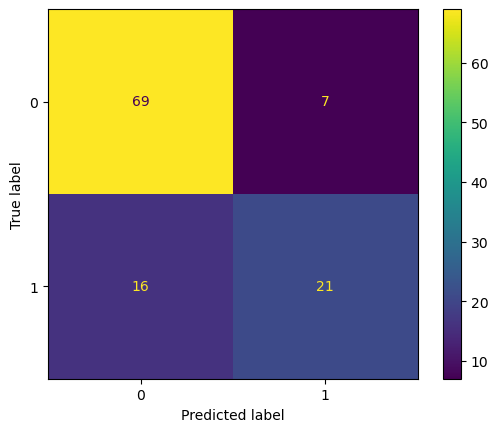

Accuracy: 79.65%


In [33]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train_data, y_train)

y_pred = clf.predict(x_test_data)


conf_metric(clf, y_test, y_pred)

# Logisitic Regression

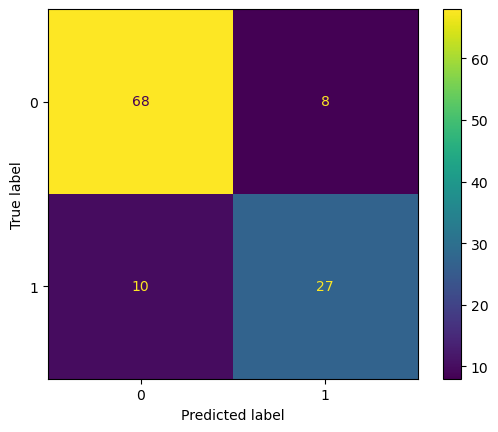

Accuracy: 84.07%
Wall time: 253 ms


In [34]:

%%time
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()          
logreg.fit(x_train_data, y_train)

y_pred = logreg.predict(x_test_data)
conf_metric(logreg, y_test, y_pred)

# Random Forest

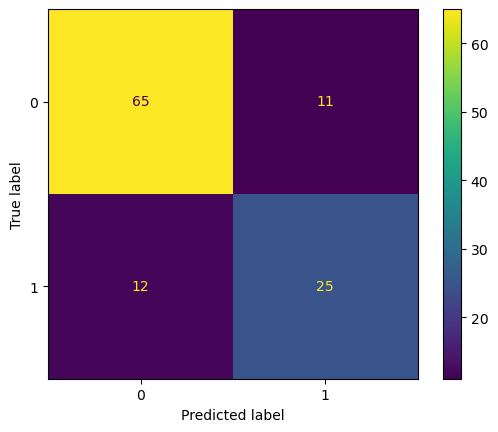

Accuracy: 79.65%
Wall time: 304 ms


In [35]:

%%time
from sklearn.ensemble import RandomForestClassifier

RF= RandomForestClassifier(n_estimators=45, criterion='gini')          
RF.fit(x_train_data, y_train)

y_pred = RF.predict(x_test_data)

conf_metric(RF, y_test, y_pred)

# KNN

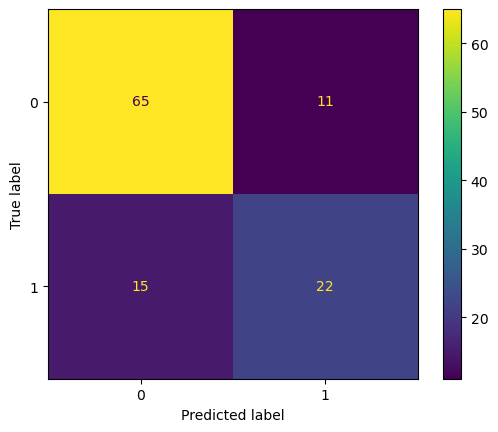

Accuracy: 76.99%


In [36]:

#import KNN model 
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors =35, metric = 'cosine', n_jobs=-1)

#train to model
knn.fit(x_train_data, y_train)
"""
"""

y_pred = knn.predict(x_test_data)
conf_metric(knn, y_test, y_pred)

# Combination

In [37]:

all_classifiers = list()

all_classifiers.append(clf)
all_classifiers.append(logreg)
all_classifiers.append(RF)
all_classifiers.append(knn)

In [38]:
def vote_predict(x_test, models):
    def tras(t):
        if t == 0:
            return "Dead"
        return "Alive"
    
    
    
    all_predictions = []      #[(c, [prdi]),(b, [prdi]),(x, [prdi])]
    
    for i in models:
        all_predictions.append((i, i.predict(x_test)))
        
    y_pre = []
    n = len(models)
    for i in range(len(x_test)): 
        count = 0
        for p in range(n):
            count += all_predictions[p][1][i]
            
        if count > int(n / 2):
            y_pre.append(1)
        elif count <= int(n / 2):
            y_pre.append(0)
        else:
            print('in equal state')
            y_pre.append(np.random.randint(2))
           
    print("Accuracy:", f'{round(accuracy_score(y_test, y_pre) * 100, 2)}%')

    t = pd.DataFrame({
            "True" : y_test,
            "predict" : y_pre 
            })
    t['True'] = t['True'].apply(tras)
    t['predict'] = t['predict'].apply(tras)  
    return t

In [39]:
a = vote_predict(x_test_data, all_classifiers)

Accuracy: 83.19%


In [40]:
a.head(50)

,True,predict
67,Dead,Dead
318,Dead,Dead
646,Dead,Dead
582,Dead,Dead
453,Dead,Dead
596,Alive,Alive
538,Dead,Dead
571,Alive,Alive
706,Dead,Dead
334,Dead,Dead
